In [1]:
import sys
sys.path.append("../MILESTONE1")
from file import df_suffle

Image mode (Channel Code) RGB
Image_size(Pixels) (2480, 3508)
DPI (301.0, 301.0)


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model


In [3]:
train_df, val_df = train_test_split(
    df_suffle,
    test_size=0.2,
    random_state=42,
    stratify=df_suffle['Brand']
)


In [4]:
IMG_SIZE = 224
BATCH_SIZE = 16

train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=2,
    brightness_range=[0.9, 1.1]
)

val_data = ImageDataGenerator(
    rescale=1./255
)


In [5]:
train_generator = train_data.flow_from_dataframe(
    train_df,
    x_col="Image",
    y_col="Brand",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_generator = val_data.flow_from_dataframe(
    val_df,
    x_col="Image",
    y_col="Brand",
    target_size=(IMG_SIZE, IMG_SIZE),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    shuffle=False
)



Found 400 validated image filenames belonging to 3 classes.
Found 100 validated image filenames belonging to 3 classes.


In [6]:
base_model=MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE,IMG_SIZE,3)
)

base_model.trainable=False
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.5)(x)
output=Dense(3,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=output)

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Epoch 1/20


c:\Users\Yatendra Pachori\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.2972 - loss: 1.3330 - val_accuracy: 0.4300 - val_loss: 0.8930
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4926 - loss: 1.0228 - val_accuracy: 0.6400 - val_loss: 0.7508
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.5346 - loss: 0.8845 - val_accuracy: 0.7100 - val_loss: 0.6755
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6196 - loss: 0.7939 - val_accuracy: 0.7900 - val_loss: 0.6235
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.5462 - loss: 0.7903 - val_accuracy: 0.7800 - val_loss: 0.5972
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.6335 - loss: 0.7044 - val_accuracy: 0.8100 - val_loss: 0.5617
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6335 - loss: 0.7305 - val_accuracy: 0.7800 - val_loss: 0.5415
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.6222 - loss: 0.7024 - val_accuracy: 0.7700 - val_loss: 0.5386
Epo

In [9]:
train_df,temp_df=train_test_split(
    df_suffle,
    test_size=0.4,         
    stratify=df_suffle['Brand'],
    random_state=42
)

val_df,test_df= train_test_split(
    temp_df,
    test_size=0.5,
    stratify=temp_df['Brand'],
    random_state=42
)

In [10]:
test_generator=val_data.flow_from_dataframe(
    test_df,
    x_col="Image",
    y_col="Brand",
    target_size=(224,224),
    color_mode="rgb",
    batch_size=16,
    shuffle=False
)


Found 100 validated image filenames belonging to 3 classes.


In [11]:
test_loss,test_accuracy=model.evaluate(test_generator)
print("test_accuracy",test_accuracy)

c:\Users\Yatendra Pachori\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 888ms/step - accuracy: 0.8149 - loss: 0.4302
test_accuracy 0.8199999928474426


In [12]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
y_true=val_generator.classes
y_pred=np.argmax(model.predict(val_generator),axis=1)

print(classification_report(
    y_true,
    y_pred,
    target_names=val_generator.class_indices.keys()
))

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step 
              precision    recall  f1-score   support

       canon       0.75      0.82      0.79        40
       epson       0.79      0.68      0.73        40
          hp       0.91      1.00      0.95        20

    accuracy                           0.80       100
   macro avg       0.82      0.83      0.82       100
weighted avg       0.80      0.80      0.80       100



<Axes: >

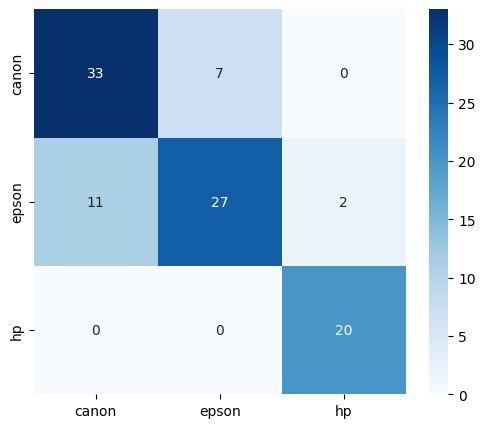

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=val_generator.class_indices.keys(),
    yticklabels=val_generator.class_indices.keys()
)


In [53]:
def grad_cam(model,image_array,last_conv1_layer_name):
    grad_model=Model([model.input],[model.get_layer(last_conv1_layer_name).output,model.output])
    
    
    with tf.GradientTape() as tap:
        conv_o, predictions = grad_model(image_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tap.gradient(loss, conv_o)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

    conv_o = conv_o[0]
    heatmap = conv_o @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap)

    return heatmap.numpy()

In [55]:
image_path=val_df.iloc[0]['Image']
imag_load=tf.keras.preprocessing.image.load_img(image_path,target_size=(224,224))
image_array=tf.keras.preprocessing.image.img_to_array(imag_load)
image_array=np.expand_dims(image_array/255.0,axis=0)

heatmap=grad_cam(model,image_array,last_conv1_layer_name='Conv_1')

(-0.5, 1023.5, 1023.5, -0.5)

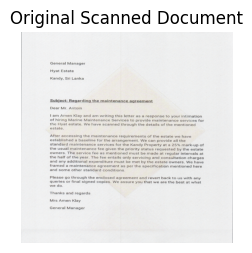

In [56]:
import cv2
original_img=cv2.imread(image_path)
original_img=cv2.cvtColor(original_img,cv2.COLOR_BGR2RGB)
original_img=cv2.resize(original_img,(1024,1024))
plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.imshow(original_img)
plt.title("Original Scanned Document")
plt.axis("off")

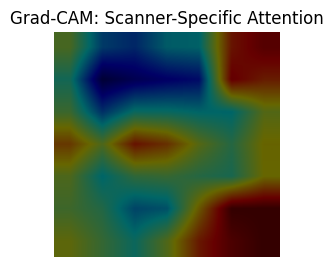

In [57]:
heatmap = cv2.resize(heatmap, (224,224))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed = heatmap * 0.4 + image_array[0]


plt.subplot(1,2,2)
plt.imshow(superimposed.astype("uint8"))
plt.title("Grad-CAM: Scanner-Specific Attention")

plt.axis("off")

plt.show()
